# Importing Data Packages

In [38]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('./Titanic-Dataset.csv')

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Data Preprocessing

### 2.1. Handling Missing Values

What is Missing Data?

    Missing data means absence of observations in columns. 
    It appears in values such as “0”, “NA”, “NaN”, “NULL”, “Not Applicable”, “None”.

Two ways to solve missing values. There are,
- Deletion
- Imputation

In [44]:
# Splitting into different data types
numcol = data.select_dtypes(include=['int64', 'float64']).columns
objcol = data.select_dtypes(include=['object'])

In [45]:
print("Missing values and their percentage: ")
for column in data.columns:
    if data[column].isnull().any():
        print(f'Column: {column} - Values: {data[column].isnull().sum()} - Percentage: {round((data[column].isnull().sum())/data.shape[0]*100)}% - Type: {data[column].dtype}')

Missing values and their percentage: 
Column: Age - Values: 177 - Percentage: 20% - Type: float64
Column: Cabin - Values: 687 - Percentage: 77% - Type: object
Column: Embarked - Values: 2 - Percentage: 0% - Type: object


#### Using dropna function to remove missing value rows

In [46]:
# Deleting Row wise
data['Cabin'].dropna(inplace=True) # Don't use or use with caution(Too much of data lose)

# Deleting Column wise
data.drop(columns=['Cabin'], inplace=True) # 77% of data were missing in Cabin column

In [47]:
data['Embarked'].fillna(value=data.Embarked.mode());

#### 2.1.1. Using Simple Imputer to handling missing values

Using Sklearn Imputers

strategy = {'mean', 'constant', 'most_frequent', 'median'}

In [48]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numcol] = impute_mean.fit_transform(data[numcol].values)

In [49]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Embarked'] = impute_mean.fit_transform(data[['Embarked']])

In [50]:
# for only one column (Simple Imputer, KNNImputer)
data['Age'] = impute_mean.fit_transform(data[['Age']])

#### 2.1.2. Using KNNImputer to handling missing values

In [51]:
from sklearn.impute import KNNImputer
impute_KNN = KNNImputer(missing_values=np.nan, n_neighbors=5)
data[numcol] = impute_KNN.fit_transform(data[numcol].values)

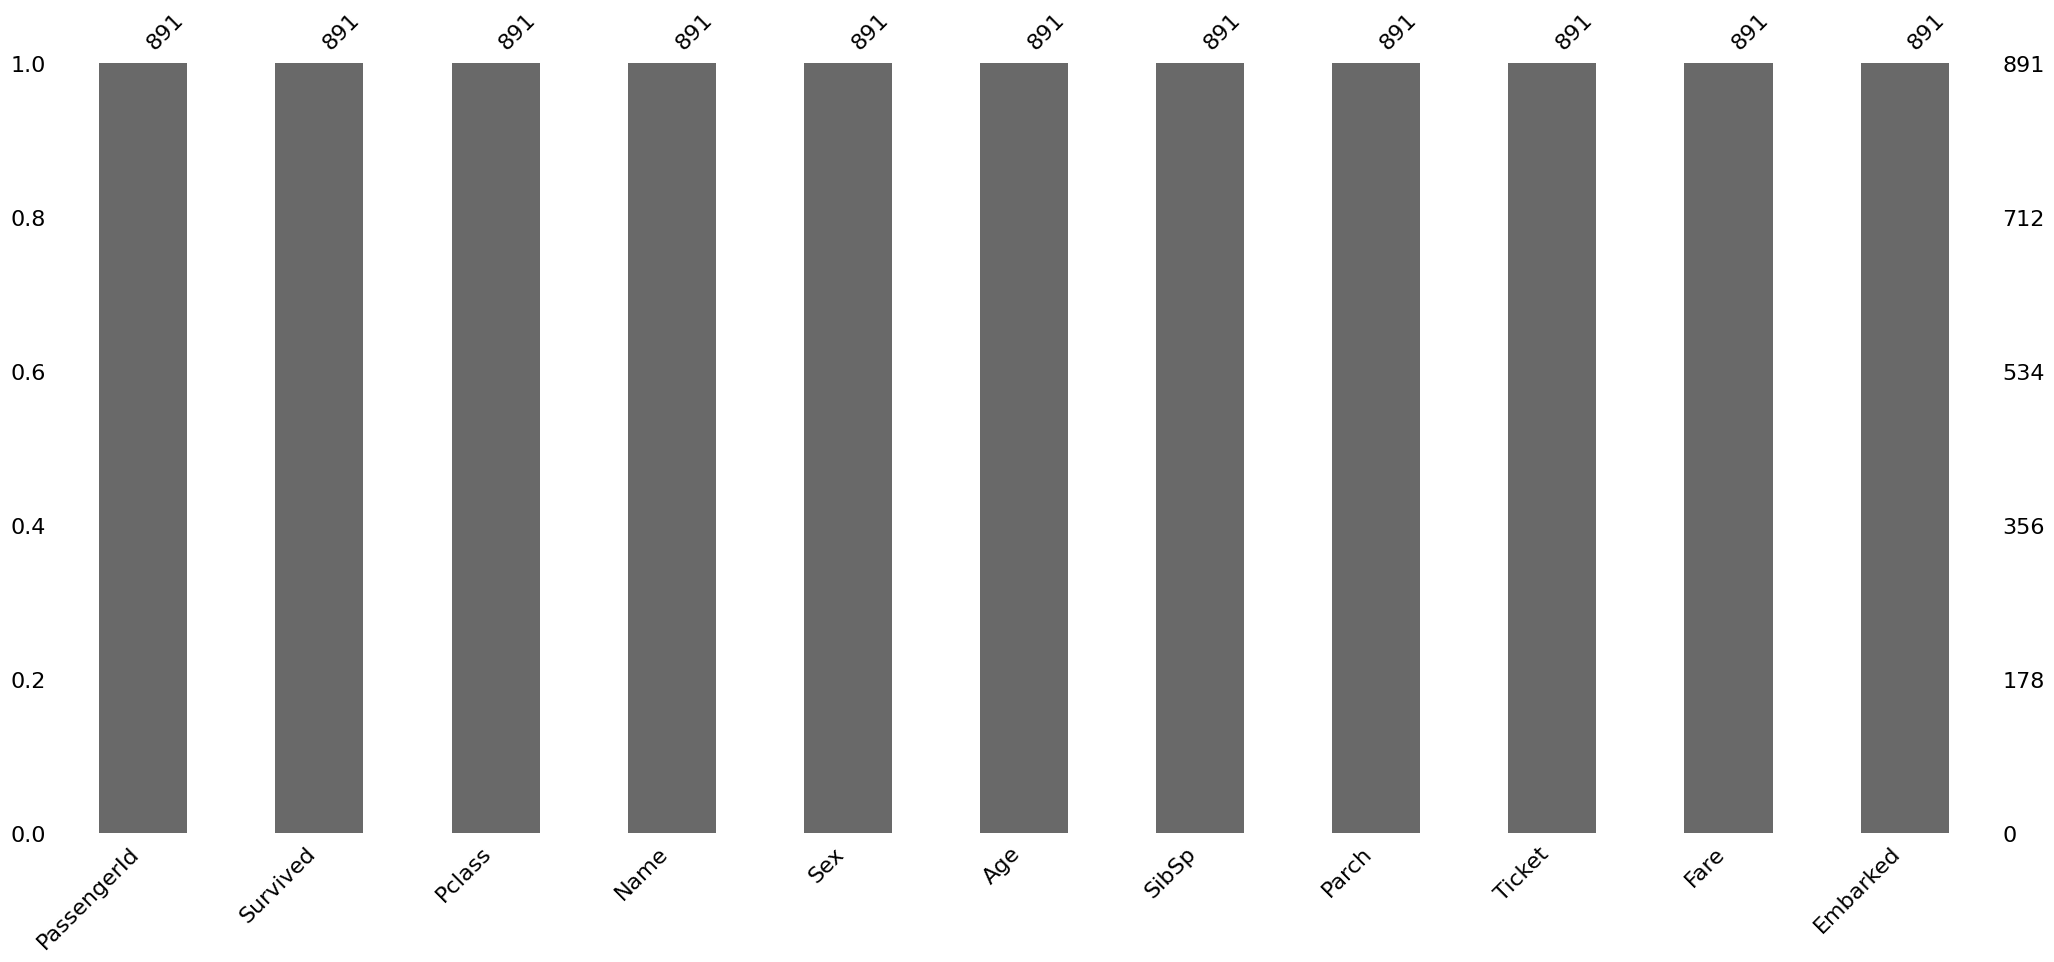

In [52]:
msno.bar(data);